<a href="https://colab.research.google.com/github/govind-100/Bayesian-Knowledge-Tracing/blob/master/%5B24%5D7_ai_ds_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The class **GradientDescent** contains sgd and mini_batch methods where I implemented the Stochastic Gradient Descent and Mini-Batch Gradient Descent respectively. \\

Squred Error is $$ J = \frac{1}{n}(Xw+b-y)^T(Xw+b-y)$$
$$ = \frac{1}{n}∑_{i=1}^{n}(w^Tx^{(i)}+b-y^{(i)})^2$$

**Stochastic Gradient Descent weight update rule:** \\
$$w = w_{old} - \eta\times(x^{(i)}w+b-y^{(i)})x_{j}^{i}$$
$$b = b_{old} - \eta\times(x^{(i)}w+b-y^{(i)})$$

Here the index *j* is randomly selected \\
We stop updating the weights once it meets stopping criteria (e.g: If the difference between w and $w_{old}$ is verry less) \\

**Mini-batch Gradient Descent update rule** \\
$$w = w_{old} - \eta\times(\frac{2}{batchsize})\sum_{i=0}^{k}(x^{(i)}w+b-y^{(i)})x^{(i)} $$
$$b = b_{old}-\eta\times(\frac{2}{batchsize})\sum_{i=0}^{k}(x^{(i)}+b-y{(i)})$$

The given dataset contains two nominal and one ordinal features. \\
Performed one-hot-encoding on nominal features and for ordinal feature I assigned numerical values (Low:1, Medium:2, High:3) \\

Minimized the Mean Square Error(MSE) using Stochastic Gradient Descent(SGD) and Mini-Batch Gradient Descent optimization methods. \\
Experimented with lerning rate = 0.001, epochs = 1000 \\
Using SGD, the minimum error 99.89 occured at 337 epoch \\
Using mini batch gradient descent, the minimum error 1.68 occured at 31 epoch.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
class GradientDescent:
  def __init__(self, lr=1e-3, epochs=1000, tol=1e-5):
    self.lr = lr
    self.epochs = epochs
    self.tol = tol

  def sgd(self, X, y, lr, epochs):
    self.lr = lr
    self.epochs = epochs
    n = len(X)
    d = X.shape[1]
    w = np.random.randn(d)
    b = np.random.randn(1)
    mse = []
    for epoch in range(self.epochs):
      for i in range(len(X)):
        ind = np.random.randint(0, len(X)-1)
        xj = X[ind]
        yj = y[ind]
        y_pred = np.dot(w, xj) + b
        error = yj - y_pred
        grad_w = -2 * xj * error
        grad_b = -2 * error
        w = w - self.lr * grad_w
        b = b - self.lr * grad_b

      y_pred = np.dot(X, w) + b
      mse.append(np.mean((y - y_pred)**2))
      # if np.mean((y - y_pred)**2) <= self.tol:
      #   break
    return w, b, mse

  def mini_batch(self, X, y, batch_size, lr, epochs):
    self.lr = lr
    self.epochs = epochs
    n = len(X)
    d = X.shape[1]
    batch_size = 32
    w = np.random.randn(d)
    b = np.random.randn()
    mse = []
    for epoch in range(self.epochs):
      indices = np.random.permutation(len(X))
      X_shuffled = X[indices]
      y_shuffled = y[indices]
      for i in range(0, len(X)-batch_size, batch_size):
        x_mini = X_shuffled[i:i+batch_size]
        y_mini = y_shuffled[i:i+batch_size].reshape(-1,)
        y_pred = np.dot(x_mini, w) + b
        error = y_mini - y_pred
        grad_w = -2*(1/len(x_mini)) * np.dot(x_mini.T, error)
        grad_b = -2*(1/len(x_mini)) * np.sum(error)
        w = w - lr * grad_w
        b = b - lr * grad_b
      y_pred = np.dot(X, w) + b
      mse.append(np.mean((y - y_pred)**2))
    return w, b, mse

In [3]:
with open("/content/drive/MyDrive/Colab Notebooks/linear_regression_dataset.csv") as f:
  df = pd.read_csv(f)

In [4]:
df.head()

,Category_1,Category_2,Ordinal_1,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Target
0,B,X,Medium,0.728,4.68000,2.207,-1.5030,1.2380,-2.0940,2.3100,-4.9570,-0.0636,-2.02700,-1.189,3.9940,77.20
1,A,Y,Medium,1.187,0.08356,2.771,0.7560,-1.1410,0.9062,0.8450,1.0030,1.6670,-0.08386,-1.844,0.9526,58.78
2,B,Y,Low,-4.793,1.85400,1.027,-0.7573,1.8550,0.9785,1.6640,3.8950,-0.3480,-0.18810,-2.540,3.5760,50.00
3,B,Y,Medium,-1.512,-0.21910,1.634,-0.3198,0.5930,-0.4540,-0.1495,0.6763,-0.3958,0.70750,3.703,-3.3220,80.44
4,NaN,X,High,-0.776,2.61300,0.651,-4.3480,0.0322,0.5073,0.9014,0.2050,2.0000,-2.84600,-0.698,1.6150,47.75


In [5]:
df["Category_1"].value_counts()

B    668
A    616
C    600
Name: Category_1, dtype: int64

In [6]:
df["Category_2"].value_counts()

X    970
Y    929
Name: Category_2, dtype: int64

In [7]:
df["Ordinal_1"].value_counts()

Low       768
Medium    735
High      407
Name: Ordinal_1, dtype: int64

In [8]:
df.shape

(2000, 16)

In [9]:
df.isna().sum()

Category_1    116
Category_2    101
Ordinal_1      90
Feature_1      83
Feature_2      77
Feature_3     119
Feature_4      94
Feature_5     108
Feature_6      97
Feature_7     102
Feature_8      92
Feature_9      86
Feature_10     84
Feature_11    105
Feature_12     99
Target          0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
encoded_df = pd.get_dummies(df, columns=['Category_1', 'Category_2'])

In [12]:
encoded_df.head()

,Ordinal_1,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Target,Category_1_A,Category_1_B,Category_1_C,Category_2_X,Category_2_Y
0,Medium,0.728,4.68000,2.2070,-1.5030,1.238,-2.0940,2.3100,-4.9570,-0.0636,-2.02700,-1.1890,3.9940,77.20,0,1,0,1,0
1,Medium,1.187,0.08356,2.7710,0.7560,-1.141,0.9062,0.8450,1.0030,1.6670,-0.08386,-1.8440,0.9526,58.78,1,0,0,0,1
2,Low,-4.793,1.85400,1.0270,-0.7573,1.855,0.9785,1.6640,3.8950,-0.3480,-0.18810,-2.5400,3.5760,50.00,0,1,0,0,1
3,Medium,-1.512,-0.21910,1.6340,-0.3198,0.593,-0.4540,-0.1495,0.6763,-0.3958,0.70750,3.7030,-3.3220,80.44,0,1,0,0,1
6,Medium,-1.197,1.84100,-0.4285,2.9730,2.303,3.1150,2.8650,-0.6597,1.3690,1.44400,0.7876,4.0350,68.25,0,0,1,0,1


In [13]:
encoded_df['Ordinal_1'] = encoded_df['Ordinal_1'].map({'Low':1,'Medium':2,'High':3})

In [14]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ordinal_1     943 non-null    int64  
 1   Feature_1     943 non-null    float64
 2   Feature_2     943 non-null    float64
 3   Feature_3     943 non-null    float64
 4   Feature_4     943 non-null    float64
 5   Feature_5     943 non-null    float64
 6   Feature_6     943 non-null    float64
 7   Feature_7     943 non-null    float64
 8   Feature_8     943 non-null    float64
 9   Feature_9     943 non-null    float64
 10  Feature_10    943 non-null    float64
 11  Feature_11    943 non-null    float64
 12  Feature_12    943 non-null    float64
 13  Target        943 non-null    float64
 14  Category_1_A  943 non-null    uint8  
 15  Category_1_B  943 non-null    uint8  
 16  Category_1_C  943 non-null    uint8  
 17  Category_2_X  943 non-null    uint8  
 18  Category_2_Y  943 non-null   

In [15]:
encoded_df.describe()

,Ordinal_1,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Target,Category_1_A,Category_1_B,Category_1_C,Category_2_X,Category_2_Y
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,1.814422,0.293967,0.426383,0.145153,0.191537,0.322064,0.142975,0.946911,0.791308,0.760133,0.259903,0.397735,0.804139,44.317080,0.340403,0.360551,0.299046,0.499470,0.500530
std,0.757499,2.539632,2.555372,1.684261,2.054133,1.406879,2.665494,0.940278,2.390890,1.078437,2.403411,2.748118,2.827528,49.720336,0.474096,0.480415,0.458083,0.500265,0.500265
min,1.000000,-8.060000,-7.066000,-4.790000,-7.113000,-4.370000,-8.550000,-2.348000,-5.617000,-2.130000,-6.188000,-9.000000,-8.260000,-93.700000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-1.468000,-1.224500,-0.984500,-1.213500,-0.589350,-1.598000,0.335550,-0.772700,0.018935,-1.407500,-1.459500,-1.158750,10.435000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.320000,0.374800,0.184400,0.183200,0.308800,0.004166,0.964000,0.703000,0.782700,0.251700,0.419200,0.770500,44.530000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,1.873000,2.078000,1.176500,1.552000,1.234000,1.921000,1.603500,2.348500,1.490500,1.908000,2.061500,2.754000,78.300000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,8.490000,8.960000,7.875000,7.470000,4.870000,8.664000,3.832000,7.370000,4.453000,7.375000,9.070000,9.430000,199.400000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
y = encoded_df['Target'].copy()
X = encoded_df.drop('Target', axis=1)

In [17]:
X.rename(columns={'Category_1_A':'Category_A','Category_1_B':'Category_B','Category_1_C':'Category_C','Category_2_X':'Category_X',\
                  'Category_2_Y':'Category_Y'}, inplace=True)

In [18]:
X.shape, y.shape

((943, 18), (943,))

In [19]:
X = np.array(X)
y = np.array(y)

In [20]:
stndX = StandardScaler()
stndY = StandardScaler()

X_stnd = stndX.fit_transform(X)
y_stnd = stndY.fit_transform(y.reshape(-1, 1))

In [21]:
grad = GradientDescent(lr=0.0001, epochs= 1000, tol=0.0001)

In [22]:
sgd_w, sgd_b, sgd_mse = grad.sgd(X, y, 0.001, 1000)

In [23]:
mini_w, mini_b, mini_mse = grad.mini_batch(X_stnd, y_stnd, batch_size=32, lr=0.001, epochs=1000)

In [24]:
np.argmin(sgd_mse)+1, np.argmin(mini_mse)+1

(52, 61)

In [25]:
sgd_mse[np.argmin(sgd_mse)], mini_mse[np.argmin(mini_mse)]

(100.0902471858888, 1.9491962330320218)

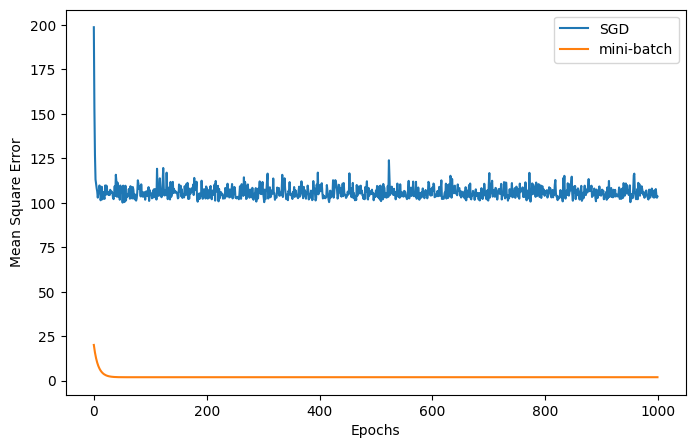

In [26]:
plt.figure(figsize=(8,5))
plt.plot(sgd_mse, label="SGD")
plt.plot(mini_mse, label="mini-batch")
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")
plt.legend()
plt.show()

In [27]:
mini_w64, mini_b64, mini_mse64 = grad.mini_batch(X_stnd, y_stnd, 64, 0.001, 1000)

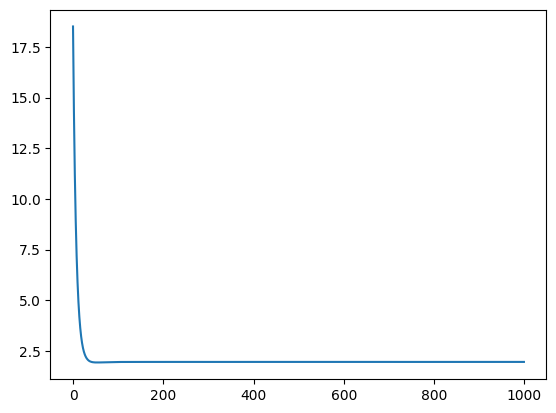

In [28]:
plt.plot(mini_mse64)
plt.show()